In [1]:
import pandas as pd

## Sourcing Data

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

df = pd.read_csv(url, delimiter=",", header="infer")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,60,64,68,72,85,90,95,104,106,109
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,30,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,444,450,453,459,463,465,470,476,483,488
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,42,42,43,44,45,45,46,46,47,47
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Transforming the Data

In [8]:
df_interest = df.loc[
    df["Country/Region"].isin(["United Kingdom", "US", "Italy", "Germany"]) &
    df["Province/State"].isna()
]
df_interest

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,0,...,6467,6623,6736,6812,6866,6993,6993,7275,7392,7510
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,27682,27967,28236,28710,28884,29079,29315,29684,29958,30201
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,26097,26771,27510,28131,28446,28734,29427,30076,30615,31241
225,NaN,US,37.0902,-95.7129,0,0,0,0,0,0,...,60967,62996,64943,66369,67682,68922,71064,73431,75662,77180


In [12]:
df_interest.rename(index= lambda x: df_interest.at[x, "Country/Region"], inplace=True)
df1 = df_interest.transpose()
df1.head()

,Germany,Italy,United Kingdom,US
Province/State,NaN,NaN,NaN,NaN
Country/Region,Germany,Italy,United Kingdom,US
Lat,51,43,55.3781,37.0902
Long,9,12,-3.436,-95.7129
1/22/20,0,0,0,0


In [17]:
df1 = df1.drop(["Province/State", "Country/Region", "Lat", "Long"])
df1 = df1.loc[(df1 != 0).any(1)]
df1.index = pd.to_datetime(df1.index)
df1.head()

,Germany,Italy,United Kingdom,US
2020-02-21,0,1,0,0
2020-02-22,0,2,0,0
2020-02-23,0,3,0,0
2020-02-24,0,7,0,0
2020-02-25,0,10,0,0


## Data Visualizations
### Line Plot

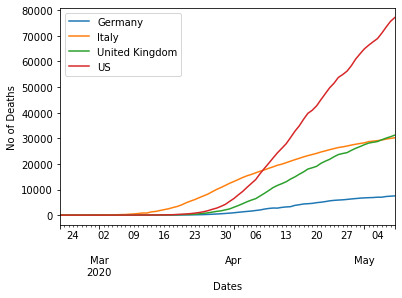

In [18]:
from matplotlib import pyplot as plt

df1.plot()
plt.xlabel("Dates")
plt.ylabel("No of Deaths")
plt.show()

### Bar Chart

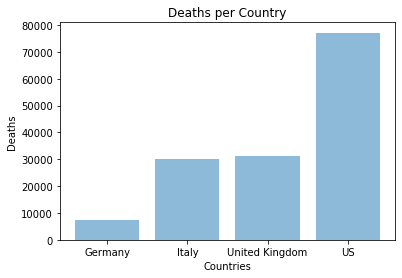

In [25]:
import numpy as np

objects = df1.max().index

y_pos = np.arange(len(objects))
performance = df1.tail(1).values.tolist()[0]

plt.bar(y_pos, performance, align="center", alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Deaths")
plt.xlabel("Countries")
plt.title("Deaths per Country")

plt.show()

### Pie Chart

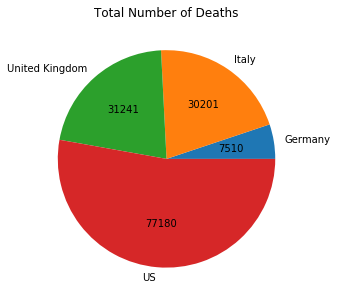

In [27]:
#Credit: https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed-python
def absolute_value(val):
    a  = np.round(val/100.*df1.max().sum(), 0)
    return int(a)

plot = df1.max().plot.pie(y=df1.max().index, figsize=(5, 5), autopct=absolute_value, label='')
plot.set_title('Total Number of Deaths', fontsize=12)
plt.show()

### Heat Map

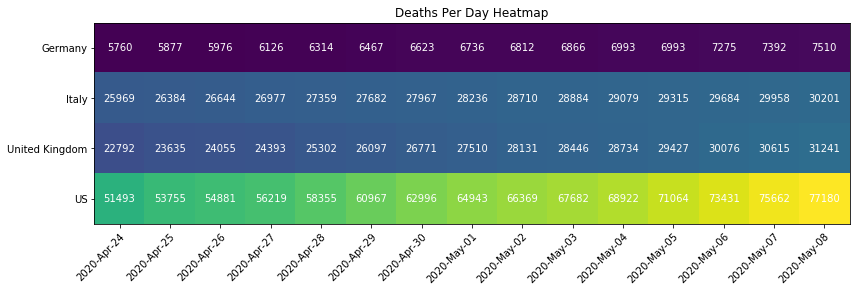

In [33]:
#Credit https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

df1 = df1.tail(15)
dates = df1.index.strftime("%Y-%b-%d")
countries = df1.max().index

df2 = pd.DataFrame(df1, columns=df1.columns).astype(int)

matrix = np.array(df2).transpose()

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(matrix)

# We want to show all ticks
ax.set_xticks(np.arange(len(dates)))
ax.set_yticks(np.arange(len(countries)))
# ... and label them with the respective list entries
ax.set_xticklabels(dates)
ax.set_yticklabels(countries)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(dates)):
    for j in range(len(countries)):
        text = ax.text(i, j, matrix[j, i],
                       ha="center", va="center", color="w", size = '10')
ax.set_title("Deaths Per Day Heatmap")
fig.tight_layout()
plt.show()